- Central Task of Visualization to explore data
- What is time series data and need converstion
- Scaler plot and correlation
- how to visualize multiple variable using relplot

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
who_time_series = pd.read_csv('WHO_time_series.csv')
who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])
print(who_time_series.head(5))
# print(who_time_series.tail(5))
# print(who_time_series.info())

  Date_reported Country  New_cases  Cumulative_cases  New_deaths  \
0    2020-01-04   China          1                 1           0   
1    2020-01-05   China          0                 1           0   
2    2020-01-06   China          3                 4           0   
3    2020-01-07   China          0                 4           0   
4    2020-01-08   China          0                 4           0   

   Cumulative_deaths  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


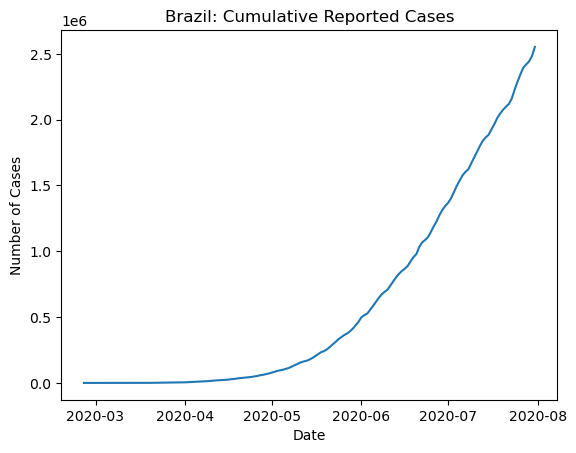

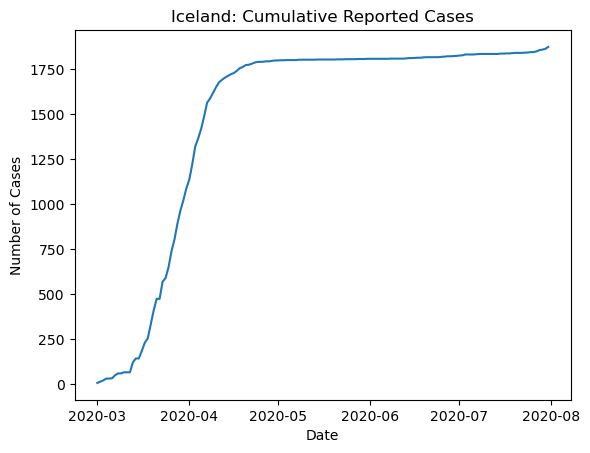

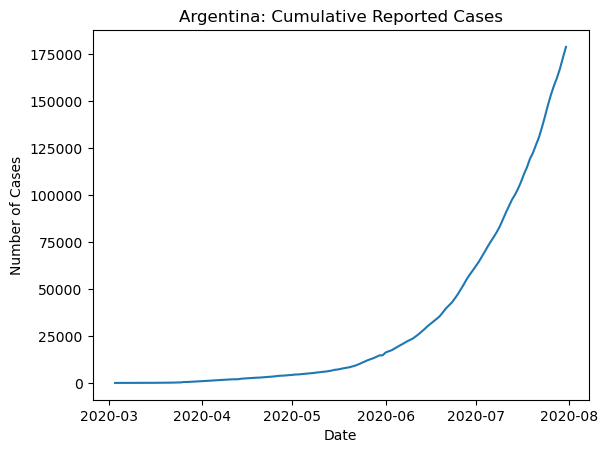

In [7]:
def plot_cumulative_cases(country_name):
    country = who_time_series[who_time_series['Country'] == country_name]
    plt.plot(country['Date_reported'], country['Cumulative_cases'])
    plt.title('{}: Cumulative Reported Cases'.format(country_name))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()


plot_cumulative_cases('Brazil')
plot_cumulative_cases('Iceland')
plot_cumulative_cases('Argentina')

brazil = 'exponential'
iceland = 'logistic'
argentina = 'exponential'

- Slowing Increase: Logarithmic Patterns
Logarithmic patterns occur when data rises quickly at first but then slows down over time, creating a curve that flattens out. While this pattern is less common in the context of COVID-19 data, it helps to understand this type of trend as it can occur in other contexts where initial rapid growth gradually slows as limits are

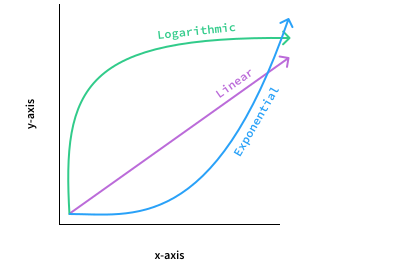

In [10]:
from IPython.display import SVG, display

# Display SVG
display(SVG('log_lin_exp.svg'))


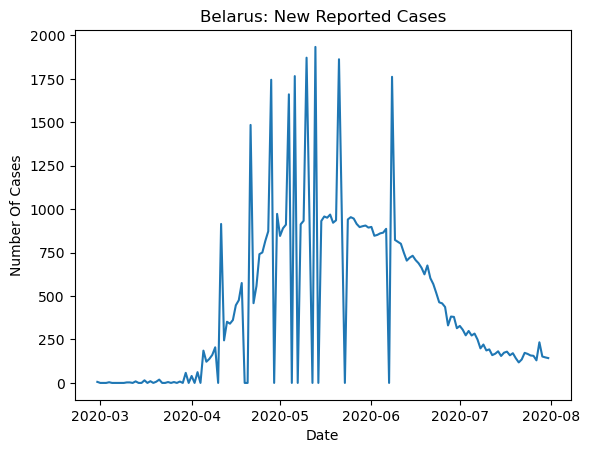

In [11]:
belarus = who_time_series[who_time_series['Country'] == 'Belarus']

plt.plot(belarus['Date_reported'], belarus['New_cases'])
plt.title('Belarus: New Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

### Comparing Line Graphs

We've learned how to build line graphs with **Matplotlib** and understand basic trends. Now, let's focus on **comparing** graphs. In our COVID-19 time series, we can explore:

- How do **UK** and **France** compare in cumulative new cases?
- How do **Mexico** and the **US** compare in cumulative deaths?
- How do new cases evolve in **India**, **Indonesia**, and **China**?
- How do total cases compare between **Europe** and **Asia** or **Africa** and **South America**?


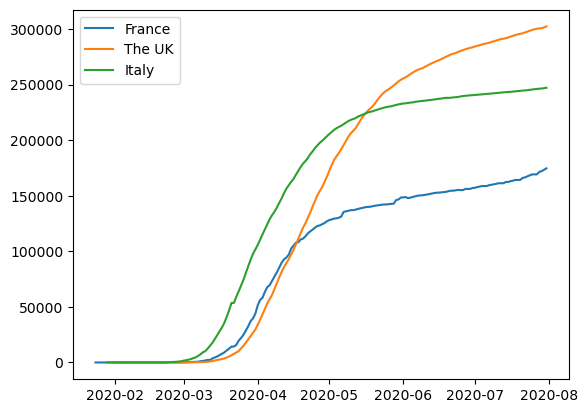

In [13]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']


plt.plot(france['Date_reported'], france['Cumulative_cases'], label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'], label='The UK')
plt.plot(italy['Date_reported'], italy['Cumulative_cases'], label='Italy')
plt.legend()
plt.show()

greatest_july = 'The UK'
lowest_july = 'France'
increase_march = 'Italy'

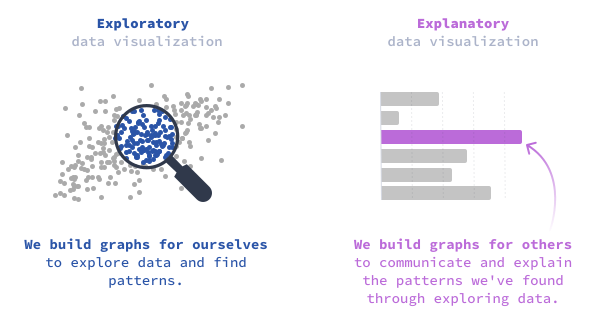

In [1]:
from IPython.display import SVG, display

# Display SVG
display(SVG("exploratory_explanatory.svg"))


### Identifying Seasonality Can Be Useful for Businesses

- **They can plan marketing campaigns at the right time.**
- **They don't need to panic needlessly when sales are decreasing as a result of seasonality.**
- **They can hire extra employees right before the period of high activity begins.**


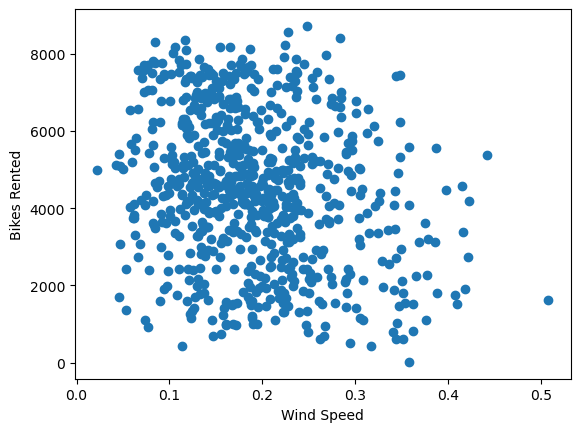

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])


plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.ylabel('Bikes Rented')
plt.xlabel('Wind Speed')
plt.show()

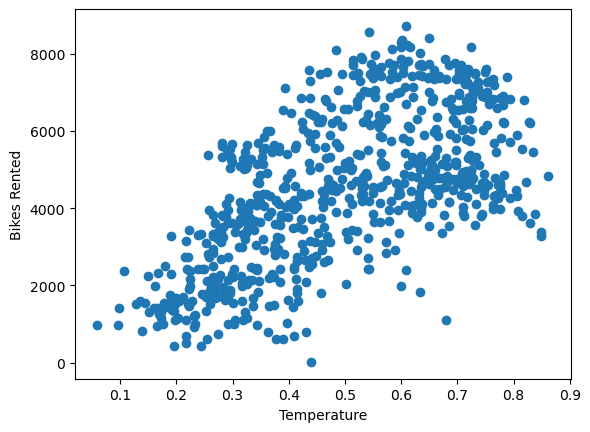

In [3]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

# There are two kinds of correlation: positive and negative.

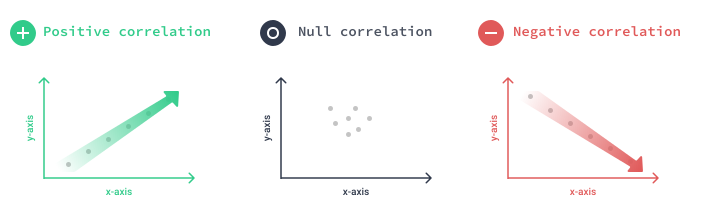

In [4]:
from IPython.display import SVG, display

# Display SVG
display(SVG("pos_nul_neg.svg"))


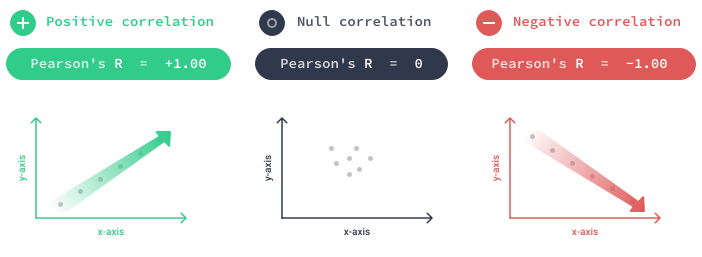

In [5]:
from IPython.display import SVG, display

# Display SVG
display(SVG("pos_nul_neg_r.svg"))

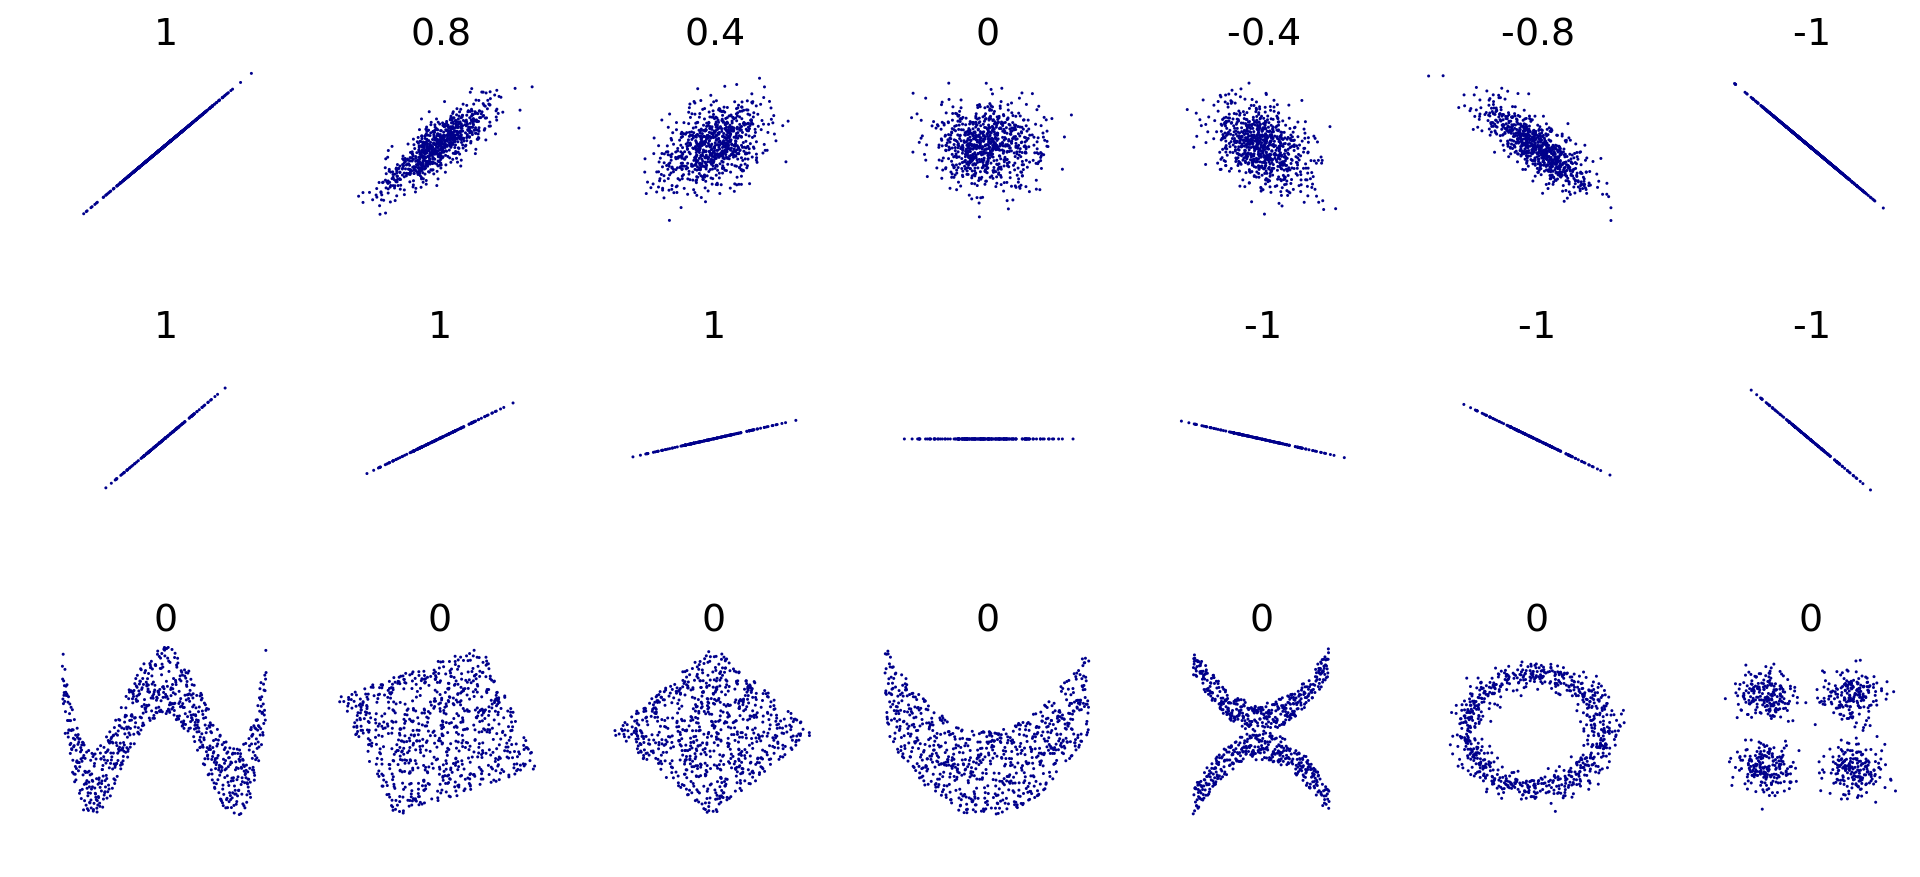

In [7]:
from IPython.display import Image, display

# Display PNG
display(Image("m2_screen6_1.png"))


In [8]:
bike_sharing['temp'].corr(bike_sharing['cnt'])

0.6274940090334917

In [12]:
temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])

In [13]:
print(temp_atemp_corr) 
print(wind_hum_corr)

0.991701553229463
-0.24848909864371396


In [14]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

In [17]:
bike_sharing.groupby(['workingday'])['casual'].sum()


workingday
0    316732
1    303285
Name: casual, dtype: int64

### Correlation vs. Causality

- **Correlation and Causality:**
  - A common mistake is assuming that a strong correlation between two columns indicates a relationship of causality (one causes the other).
  
- **Example:**
  - Suppose there is a strong positive correlation between the number of bike rentals and ice cream sales.
  - When bike rentals go up, ice cream sales tend to go up as well, and when bike rentals decrease, ice cream sales decrease too.
  - This correlation doesn't imply that ice cream sales cause bike rentals to increase or decrease (or vice versa).
  - **Explanation:** Both bike rentals and ice cream sales are likely influenced by temperature variations, causing them to change in a similar manner.

- **Correlation Suggesting Causality:**
  - Correlation **might** suggest causality, but it doesn't prove it.
  - To establish causality, rigorous experiments and further investigation are required.

- **Key Point:**
  - Correlation does not imply causation — we can't conclude that X causes Y simply because they are correlated.


# We need to figure out working day me casual versus Registered ka kya pattern hai

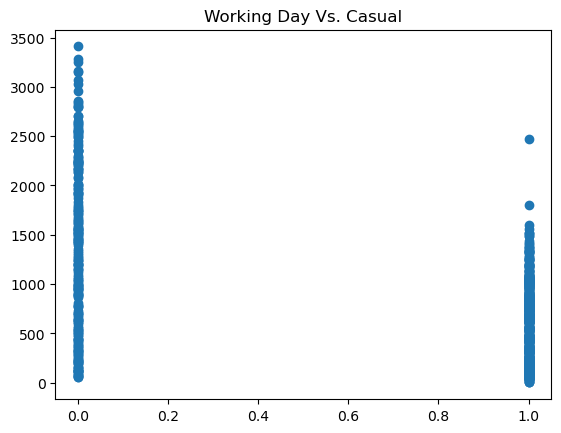

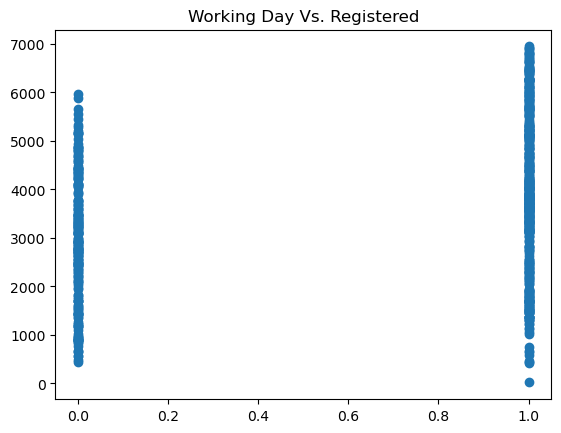

In [20]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title('Working Day Vs. Casual')
plt.show()

plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered')
plt.show()

-Analyze the bar plot in light of our initial observations — does the results support the idea that registered users rent more bikes on working days?

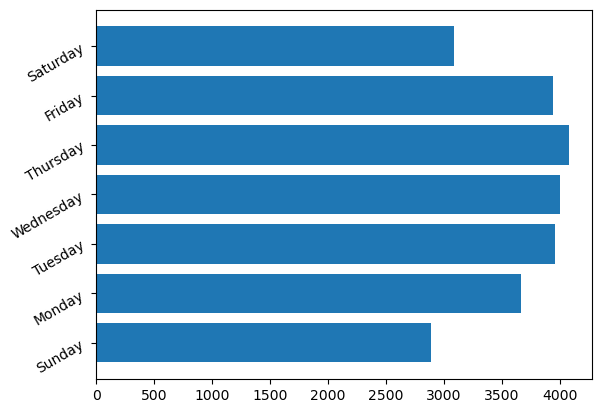

In [24]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
weekday_averages = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index() # It's not essential to understand how this code works, we'll cover this in a later course


plt.barh(weekday_averages['weekday'], weekday_averages['registered'])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

- we can not plot bargraph for count of column as it shows the daily count and it leads to large number of small bar which leads to confusion
-  so histo gram is very good option

In [25]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: count, dtype: int64

- there are 13 days when only 13.307 to 891 bike rented
- most of the day bike rented between 4368 to 5237

# Histogram

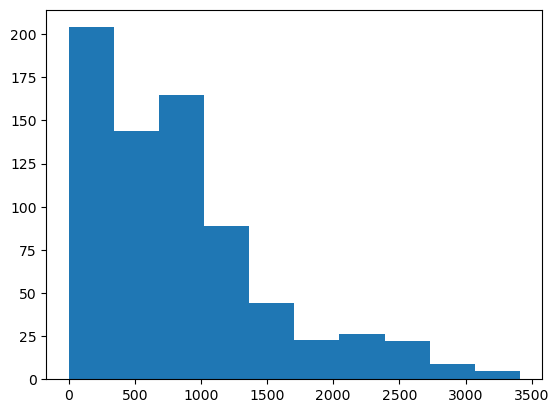

In [26]:
#Distribution of Bike rentals
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])


plt.hist(bike_sharing['casual'])
plt.show()

### Key Points on Histogram and Normal Distribution

1. **Symmetry in Histograms**:
   - A histogram shows the distribution of values.
   - If a histogram is symmetrical, a vertical line in the middle divides it into two mirror-image halves.

2. **Symmetrical Distribution**:
   - When the histogram is symmetrical, it indicates a **symmetrical distribution** of data.

3. **Normal (Gaussian) Distribution**:
   - A common type of symmetrical distribution is the **normal distribution**.
   - In a normal distribution, most values cluster around the middle, with fewer values as we approach the extremes (minimum and maximum).

4. **Example of Normal Distribution (Student Grades)**:
   - Most students score around the **average** mark.
   - As scores move towards the **minimum** or **maximum**, the number of students decreases.


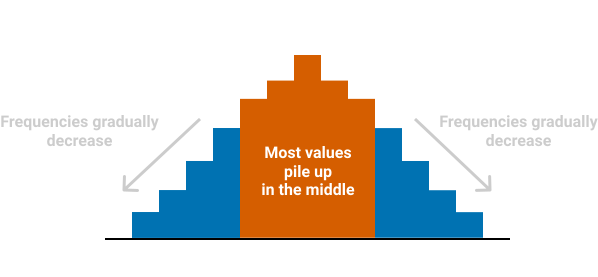

In [28]:
from IPython.display import SVG, display

# Display SVG
display(SVG("s1m4_normal.svg"))


- If we plotted a histogram for the grades students earned on a math test, and the distribution is uniform, this means that all the marks (or the mark intervals) have the same frequency.

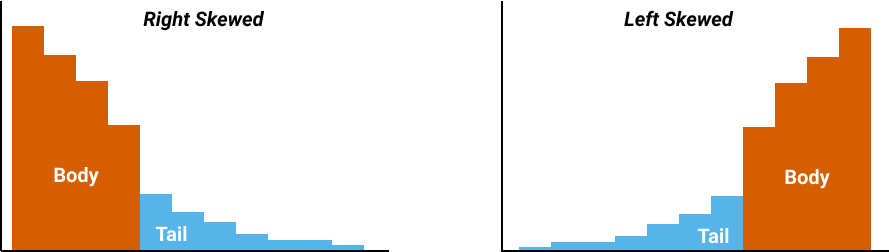

In [29]:
from IPython.display import Image, display

# Display PNG
display(Image("m3_0.png"))
